In [7]:
%cd /home/ahaase/pc/Daten/DWBA
%pylab
from aastylebib import *
import matplotlib.gridspec as gridspec
import fitting
import reflectivity
import pso
data_color = "#A60628"
fit_color = "#348ABD"
third_color = "#467821"

/home/ahaase/pc/Daten/DWBA
Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
def eval_xrr(p, wls, dat):
    sio2, si, mo, c, s, d_si, d_mo, d_C, b4c, d_b4c= p
    N = 64
    import numpy as np
    shift = 0.0
    sigma = s
    stack = [c,si,b4c,mo]
    capthicknesses = [sio2,si,b4c,mo]
    henkes = ["C",'Si',"B4C",'Mo']
    caphenkes = ["SiO2",'Si','B4C',"Mo"]
    densities = [d_C,d_si,d_b4c,d_mo]
    capdensities = [d_si,d_si,d_b4c,d_mo]
    euv_h = reflectivity.xrr(15.0,
                     wls,
                     stack,
                     henkes,
                     N,
                     None,sigma,
                     "Si", densities,None,0,capthicknesses, caphenkes, capdensities)             
        
    euv = euv_h

    return euv
    
    

In [3]:
def residual_mosi(p, wls, dat):
    import fitting
    sio2, si, mo, c, s, d_si, d_mo, d_C, b4c, d_b4c= p
    N=64
    import numpy as np
    shift = 0.0
    sigma = s
    stack = [c,si,b4c,mo]
    capthicknesses = [sio2,si,b4c,mo]
    henkes = ["C",'Si',"B4C",'Mo']
    caphenkes = ["SiO2",'Si','B4C',"Mo"]
    densities = [d_C,d_si,d_b4c,d_mo]
    capdensities = [d_si,d_si,d_b4c,d_mo]
    euv_h = fitting.residual_spec(15.0,
                          wls,
                          dat,
                          stack,
                          henkes,
                          N,
                          sigma,
                          densities,capthicknesses, caphenkes, capdensities)
    

    euv = euv_h

    xi = np.array(euv)*len(euv)
    return xi

In [4]:
%cd /home/ahaase/Dropbox/PTB/Dissertation/thesis/material/
wl = np.load("PTB17_wl.npy")
dat = np.load("PTB17_dat.npy")

/home/ahaase/Dropbox/PTB/Dissertation/thesis/material


In [5]:
pc

NameError: name 'pc' is not defined

In [28]:
lb = [0.0, #sio2,   2
    0.0, #si,     3
    0.0, #mo,     4
    0.0, #c,      5
    0.0, #s,      6
    0.5, #d_si,   7
    0.5, #d_mo,   8
    0.5, #d_C,    9
    0.0, #b4c,   10
    0.5] #d_B4C      12

In [26]:
ub = [7.0, #sio2,   2
    7.0, #si,     3
    7.0, #mo,     4
    7.0, #c,      5
    2.0, #s,      6
    1.0, #d_si,   7
    1.0, #d_mo,   8
    1.0, #d_C,    9
    7.0, #b4c,   10
    1.0] #d_B4C      12

In [8]:
weights = [1.0, #sio2,   2
    1.0, #si,     3
    1.0, #mo,     4
    1.0, #c,      5
    0.1, #s,      6
    1.0, #d_si,   7
    1.0, #d_mo,   8
    1.0, #d_C,    9
    1.0, #b4c,   10
    1.0] #N      12

In [40]:
cols = ['$d_{\\mathrm{SiO}_2\mathrm{(cap)}}$ / nm',
    '$d_\\mathrm{Si}$ / nm',
    '$d_\\mathrm{Mo}$ / nm',
    "$d_\\mathrm{C}$ / nm", 
    "$\\sigma$ / nm", 
    '$\\rho_\\mathrm{Si}$',
    "$\\rho_\\mathrm{Mo}$",
    "$\\rho_\\mathrm{C}$",
    "$d_{\\mathrm{B}_4\\mathrm{C}}$ / nm",
    "$\\rho_{\\mathrm{B}_4\\mathrm{C}}$"]     

In [24]:
schwarm = pso.Schwarm(residual_mosi,100,0.7)
schwarm.initialize(lb,
                       ub,
                       weights)
schwarm.run_dwba((wl, dat),2000, None, None, False,100,500,False,False,None)

1: new global minimum xi = 5.863186e+02
[0.5404742759561456, 3.9813025807327023, 1.0711522923541843, 1.2737973587701945, 0.16286597554049254, 0.828455496226272, 0.5358368001121749, 0.6405721774850881, 0.5574758215295974, 0.9487053969722686]
2: new global minimum xi = 1.306950e+02
[1.6904118003479827, 2.651996931972649, 2.030586021175983, 0.8101634337354413, 0.3453551075054674, 0.8156806425025269, 0.930123315199725, 0.7681551699014695, 1.4481891140837002, 0.9484170732527104]
4: new global minimum xi = 7.474543e+01
[1.1180030821584106, 2.6412616130154554, 2.2159904432707034, 0.90395666097459182, 0.3403674549881246, 0.85006879880579211, 0.82856231761667998, 0.77101772232642163, 1.1866566987216036, 0.85886937926520701]
7: new global minimum xi = 4.083277e+01
[1.4622098112067878, 2.4868611991954399, 2.3459904275916479, 0.90731303689359277, 0.3632832909404401, 0.84222581188193746, 0.90727996472751948, 0.71155363477694933, 1.2553456038589144, 0.91167397318399579]
9: new global minimum xi = 3.

[1.597455400956755,
 2.0790485719054188,
 3.8067417031704163,
 0.15100039115009742,
 0.30627250572969356,
 0.84825147947330648,
 0.96057624309346756,
 0.50411155010904962,
 1.0205452545650495,
 0.77871845654356475]

In [10]:
p = [3.1370025256302454, 1.7417539659005272, 3.1701245506146569, 0.61662820445940092, 0.35339562041416506, 0.82914256336901482, 0.99999914432475856, 0.60699970047101581, 1.510189623363575, 0.6743791286807308]

In [11]:
np.sum(residual_mosi(p, wl, dat))

143.76927702648828

In [12]:
fig = plt.figure(figsize=fig_golden_ratio(2*15/3))
ax = fig.add_subplot(111)

ax.plot(wl, dat, ".-", color=data_color, label="measured data")


ax.legend(loc=2)
ax.set_ylabel("Reflectance")
ax.set_xlabel("wavelength $\\lambda$ / nm")        
ax.set_ylim((0.0,0.8))
fig.savefig("/home/ahaase/Dropbox/PTB/Dissertation/thesis/img/PTB17_reflectance_AOI_15.pdf")
ax.plot(wl, eval_xrr(pc,wl,dat), "-", color=fit_color, label="PSO fit")
ax.legend(loc=2)
fig.savefig("/home/ahaase/Dropbox/PTB/Dissertation/thesis/img/PTB17_reflectance_AOI_15_fitted.pdf")
fig

NameError: name 'pc' is not defined

In [12]:
wl[argmax(dat)]

13.139830595110697

## MCMC

In [12]:
ndim = len(p)

In [13]:
import corner
import datetime

import matplotlib
matplotlib.use('Tkagg')
from matplotlib import pyplot as plt

#from setup_fit_e4 import *

import emcee

def lnprior(x):
    for i, y in enumerate(x):
        if y < lb[i] or y > ub[i]:
            return -np.inf
        if x[1]+x[2]+x[3]+x[8]>9.0:
            return -np.inf
    return 0.0

# we use e^(-chisqr/2) as our likelihood, with chisqr from the log-intensities.
def lnlike(x):
    return -objective(x)/2

# combined probability
def lnprob(x):
    lp = lnprior(x)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(x)

from IPython.display import clear_output
def mcmc(xopt, theview, nwalkers=100, steps=1000, start=None, filenames="progress", samplename="PS56XX", **kwargs):
    # initialize walkers around our solution from pso, using a tiny gaussian ball around xopt
    # use 500 walkers to get better statistics
    ndim = len(xopt)
    if start is None:
        start_pos = [xopt + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
    else:
        start_pos = start

    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, pool=theview, threads=None ,**kwargs)
    #sampler.run_mcmc(start_pos, steps)
    start = datetime.datetime.now()
    for sn, st in enumerate(sampler.sample(start_pos, iterations=steps)):
        if sn % 50== 0:
            print('MCMC: {} steps done in {}'.format(sn+1, datetime.datetime.now()-start))
            print('Total time estimate: {}'.format(steps*(datetime.datetime.now()-start)/(sn+1)))
            print('Total time remaining: {}'.format((steps-sn+1)*(datetime.datetime.now()-start)/(sn+1)))
            plot_chains_collective(sampler, fname=filenames, ndim=ndim, lim=sn)
            np.save("chain_%s_intermediate.npy" % samplename, sampler.chain)
            np.save("lnprob_%s_intermediate.npy" % samplename, sampler.lnprobability)

    # we throw away the first steps as burn-in
    samples = sampler.chain[:, :, :].reshape((-1, ndim))

    return sampler, samples

# some diagnostics
def plot_chains(sampler, fname=None, ndim=ndim, lim=1000):
    figures = {}
    for k in xrange(ndim):
        figures[cols[k]] = plt.figure()
        plt.title(cols[k])
        for i in xrange(len(sampler.chain)):
            plt.plot(sampler.chain[i,:lim,k], color='k', alpha=0.02)
    if fname is not None:
        for col in figures:
            figures[col].savefig(fname + col + '.png')
            plt.close(figures[col])
        return
    return figures

def plot_chains_collective(sampler, fname=None, ndim=ndim, lim=1000):
    figure = plt.figure(figsize=(18,14))
    ax = []
    for i in xrange(ndim):
        ax.append(figure.add_subplot(4,4,i+1))
    for k in xrange(ndim):
        ax[k].set_title(cols[k])
        for i in xrange(len(sampler.chain)):
            ax[k].plot(sampler.chain[i,:lim,k], color='k', alpha=0.02)
    if fname is not None:
        figure.savefig(fname + '.png')
        plt.close(figure)
        return
    return figures

def objective(p):
    res = residual_mosi(p, *arguments)
    chisq = np.sum(res)
    return chisq

/home/ahaase/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [14]:
arguments = (wl, dat)

In [16]:
from ipyparallel import Client


# Set up the interface to the ipcluster.
c = Client(profile='main', retries=5)
view = c[:]
lbview = c.load_balanced_view()
def push():
    view.execute("import numpy as np")
    view.execute("import reflectivity")
    view.execute("import helper")
    view.push({"lnlike": lnlike})
    view.push({"lnprior": lnprior})
    view.push({"objective": objective})
    view.push({"cols" : cols})

    view.push({"lnprob": lnprob, 
               "residual_mosi" : residual_mosi, 
               "lb" : lb, 
               "ub" : ub, 
               "arguments": arguments})
    print len(view)
push()

Waiting for connection file: ~/.ipython/profile_main/security/ipcontroller-client.json


KeyboardInterrupt: 

In [17]:
objective(p)

143.76927702648828

In [18]:
%cd /home/ahaase/Dropbox
chain = np.load("chain_%s_EUV.npy" % name)

/home/ahaase/Dropbox


NameError: name 'name' is not defined

In [19]:
chain[:,-1,:]

NameError: name 'chain' is not defined

In [31]:
%cd /home/ahaase/Dropbox
%pylab
walker = 80*4
iterations = 20000


start = np.zeros((walker,len(lb)))
for i in xrange(walker):
    while True:
        for j in xrange(len(lb)):
            start[i,j] = random.uniform(lb[j],ub[j])
        if lnprior(start[i,:]) != -np.inf:
            break
#start = chain[:,-1,:]

push()
sampler, samples = mcmc(lb, lbview, walker, iterations, start, samplename="PTB17")
plot_chains_collective(sampler, fname=name+'_EUV', ndim=start.shape[-1], lim=iterations)

name='PTB17_2'
%cd /home/ahaase/Dropbox/PTB/Dissertation/thesis/material/
np.save("lnprobability_%s_EUV.npy" % name,sampler.lnprobability)
np.save("chain_%s_EUV.npy" % name,sampler.chain)
np.save("acceptance_fraction_%s_EUV.npy" % name,sampler.acceptance_fraction)

/home/ahaase/Dropbox
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
28
MCMC: 1 steps done in 0:00:03.698791
Total time estimate: 20:33:00.320000
Total time remaining: 20:33:07.659198
MCMC: 51 steps done in 0:01:40.822272
Total time estimate: 10:58:58.436470
Total time remaining: 10:57:21.883778
MCMC: 101 steps done in 0:03:22.325543
Total time estimate: 11:07:44.542574
Total time remaining: 11:04:26.231955
MCMC: 151 steps done in 0:05:04.477876
Total time estimate: 11:12:08.277748
Total time remaining: 11:07:07.883481
MCMC: 201 steps done in 0:06:46.904695
Total time estimate: 11:14:48.070149
Total time remaining: 11:08:05.223702
MCMC: 251 steps done in 0:08:30.287536
Total time estimate: 11:17:40.383904
Total time remaining: 11:09:14.176367
MCMC: 301 steps done in 0:10:13.796873
Total time estimate: 11:19:43.881063
Total time remaining: 11:09:34.176571
MCMC: 351 steps done in 0:11:56.753043
Total time estimate: 11:20:40.678461
Total tim

KeyboardInterrupt: 

In [32]:
name = "PTB17_2"
%cd /home/ahaase/Dropbox/PTB/Dissertation/thesis/material/
np.save("lnprobability_%s_EUV.npy" % name,sampler.lnprobability)
np.save("chain_%s_EUV.npy" % name,sampler.chain)
np.save("acceptance_fraction_%s_EUV.npy" % name,sampler.acceptance_fraction)

/home/ahaase/Dropbox/PTB/Dissertation/thesis/material


NameError: name 'sampler' is not defined

In [41]:
%cd /home/ahaase/Dropbox/PTB/Dissertation/thesis/material/
name = "PTB17"
lnprobability =  np.load("lnprobability_%s_EUV.npy" % name)
chain = np.load("chain_%s_EUV.npy" % name)


/home/ahaase/Dropbox/PTB/Dissertation/thesis/material


In [42]:
chain = chain[:,1000:2500,:].reshape((-1,10))

In [43]:
idx = np.nanargmax(lnprobability[:,1000:2500])
pc = chain[idx, :]

In [44]:
objective(pc)

NameError: name 'objective' is not defined

In [19]:
chain.shape

(320000, 10)

In [20]:
cols

['$d_{\\mathrm{SiO}_2\\mathrm{(cap)}}$',
 '$d_\\mathrm{Si}$',
 '$d_\\mathrm{Mo}$',
 '$d_\\mathrm{C}$',
 '$\\sigma$',
 '$\\rho_\\mathrm{Si}$',
 '$\\rho_\\mathrm{Mo}$',
 '$\\rho_\\mathrm{C}$',
 '$d_{\\mathrm{B}_4\\mathrm{C}}$',
 '$\\rho_{\\mathrm{B}_4\\mathrm{C}}$']

In [ ]:
fig = corner.corner(chain[chain[:,6]<1.9], bins=30,levels=[1 - np.exp(-(1/1)**2/2),1 - np.exp(-(2/1)**2/2)],color='#A60628',
              contour_kwargs={'colors':'black'}, truths=pc, labels=array(cols), figsize=(3,3))
fig

KeyboardInterrupt: 

In [ ]:
fig = corner.corner(chain[:,[0,1,2,4]], bins=30,levels=[1 - np.exp(-(1/1)**2/2),1 - np.exp(-(2/1)**2/2)],color='#A60628',
              contour_kwargs={'colors':'black'}, truths=pc[[0,1,2,4]], labels=array(cols)[[0,1,2,4]], figsize=(3,3))
fig

In [21]:
array(cols)[[0,1,2,4]]

array(['$d_{\\mathrm{SiO}_2\\mathrm{(cap)}}$', '$d_\\mathrm{Si}$',
       '$d_\\mathrm{Mo}$', '$\\sigma$'], 
      dtype='|S34')

In [22]:
fig_golden_ratio(15.0)

(5.905511811023622, 3.6498836903730667)

In [23]:
p = pc

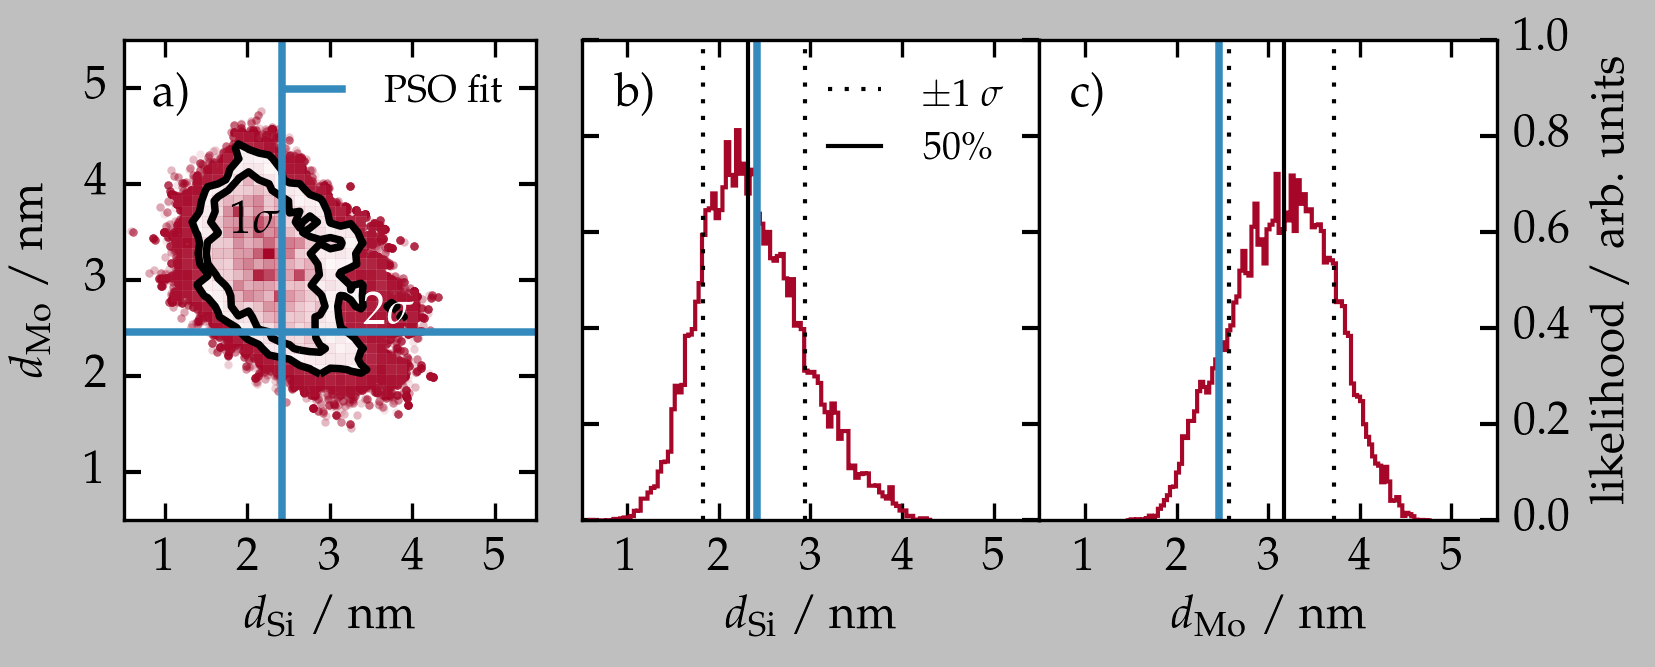

In [24]:
fig = plt.figure(figsize=(5.906,2))
gs = gridspec.GridSpec(1,30)
gs.update(wspace=0.0)
ax = fig.add_subplot(gs[0,:9])
ax2 = fig.add_subplot(gs[0,10:20])
ax3 = fig.add_subplot(gs[0,20:])
corner.hist2d(chain[:,1],
              chain[:,2],
              bins=30,
              levels=[1 - np.exp(-(1/1)**2/2),1 - np.exp(-(2/1)**2/2)],
              ax=ax,
              color='#A60628',
              contour_kwargs={'colors':('black','black')})
ax.set_ylim((0.5,5.5))
ax.set_xlim((0.5,5.5))
ax.hlines(p[2],0.0,6.0, color='#348ABD', linestyle="-", label="PSO fit")
ax.vlines(p[1],0.0,6.0, color='#348ABD', linestyle="-")

ax.text(1.8,3.5,"$1\\sigma$")
ax.text(3.4,2.56,"$2\\sigma$", color='w')
ax.set_ylabel("$d_\\mathrm{Mo}$ / nm")
ax.set_xlabel("$d_\\mathrm{Si}$ / nm")
ax.text(0.07,0.93,"a)",transform=ax.transAxes,verticalalignment='top')
ax.legend(loc=1)

#hist, val = np.histogram(chain[:,1], 100)
ax2.hist(chain[:,1], 100, histtype='step', normed=True, color=data_color)
ax2.set_ylim((0.0,1.0))
ax2.vlines(p[1],0.0,ax2.get_ylim()[1], color='#348ABD', linestyle="-")
l,u,c = np.percentile(chain[:,1],(50-34.1,50+34.1,50.0))
ax2.vlines(l,0.0,ax2.get_ylim()[1], color='black', linestyle="dotted", lw=1)
ax2.vlines(u,0.0,ax2.get_ylim()[1], color='black', linestyle="dotted", lw=1, label="$\\pm 1$ $\\sigma$")
ax2.vlines(c,0.0,ax2.get_ylim()[1], color='black', linestyle="-", lw=1, label="$50\%$")
ax2.set_xlim((0.5,5.5))
ax2.set_yticklabels(())
ax2.set_xlabel("$d_\\mathrm{Si}$ / nm")
ax2.text(0.07,0.93,"b)",transform=ax2.transAxes,verticalalignment='top')
ax2.legend(loc=1)


ax3.hist(chain[:,2], 100, histtype='step', normed=True, color=data_color)
ax3.set_ylim((0.0,1.0))
ax3.vlines(p[2],0.0,ax3.get_ylim()[1], color='#348ABD', linestyle="-")
l,u,c = np.percentile(chain[:,2],(50-34.1,50+34.1,50.0))
ax3.vlines(l,0.0,ax3.get_ylim()[1], color='black', linestyle="dotted", lw=1)
ax3.vlines(u,0.0,ax3.get_ylim()[1], color='black', linestyle="dotted", lw=1)
ax3.vlines(c,0.0,ax3.get_ylim()[1], color='black', linestyle="-", lw=1)
ax3.set_xlim((0.5,5.5))
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.set_ylabel("likelihood / arb. units", )
ax3.text(0.07,0.93,"c)",transform=ax3.transAxes,verticalalignment='top')
ax3.set_xlabel("$d_\\mathrm{Mo}$ / nm")

fig.savefig("/home/ahaase/Dropbox/PTB/Dissertation/thesis/img/PTB17_MCMC_d_Mo_vs_d_Si.pdf")
fig

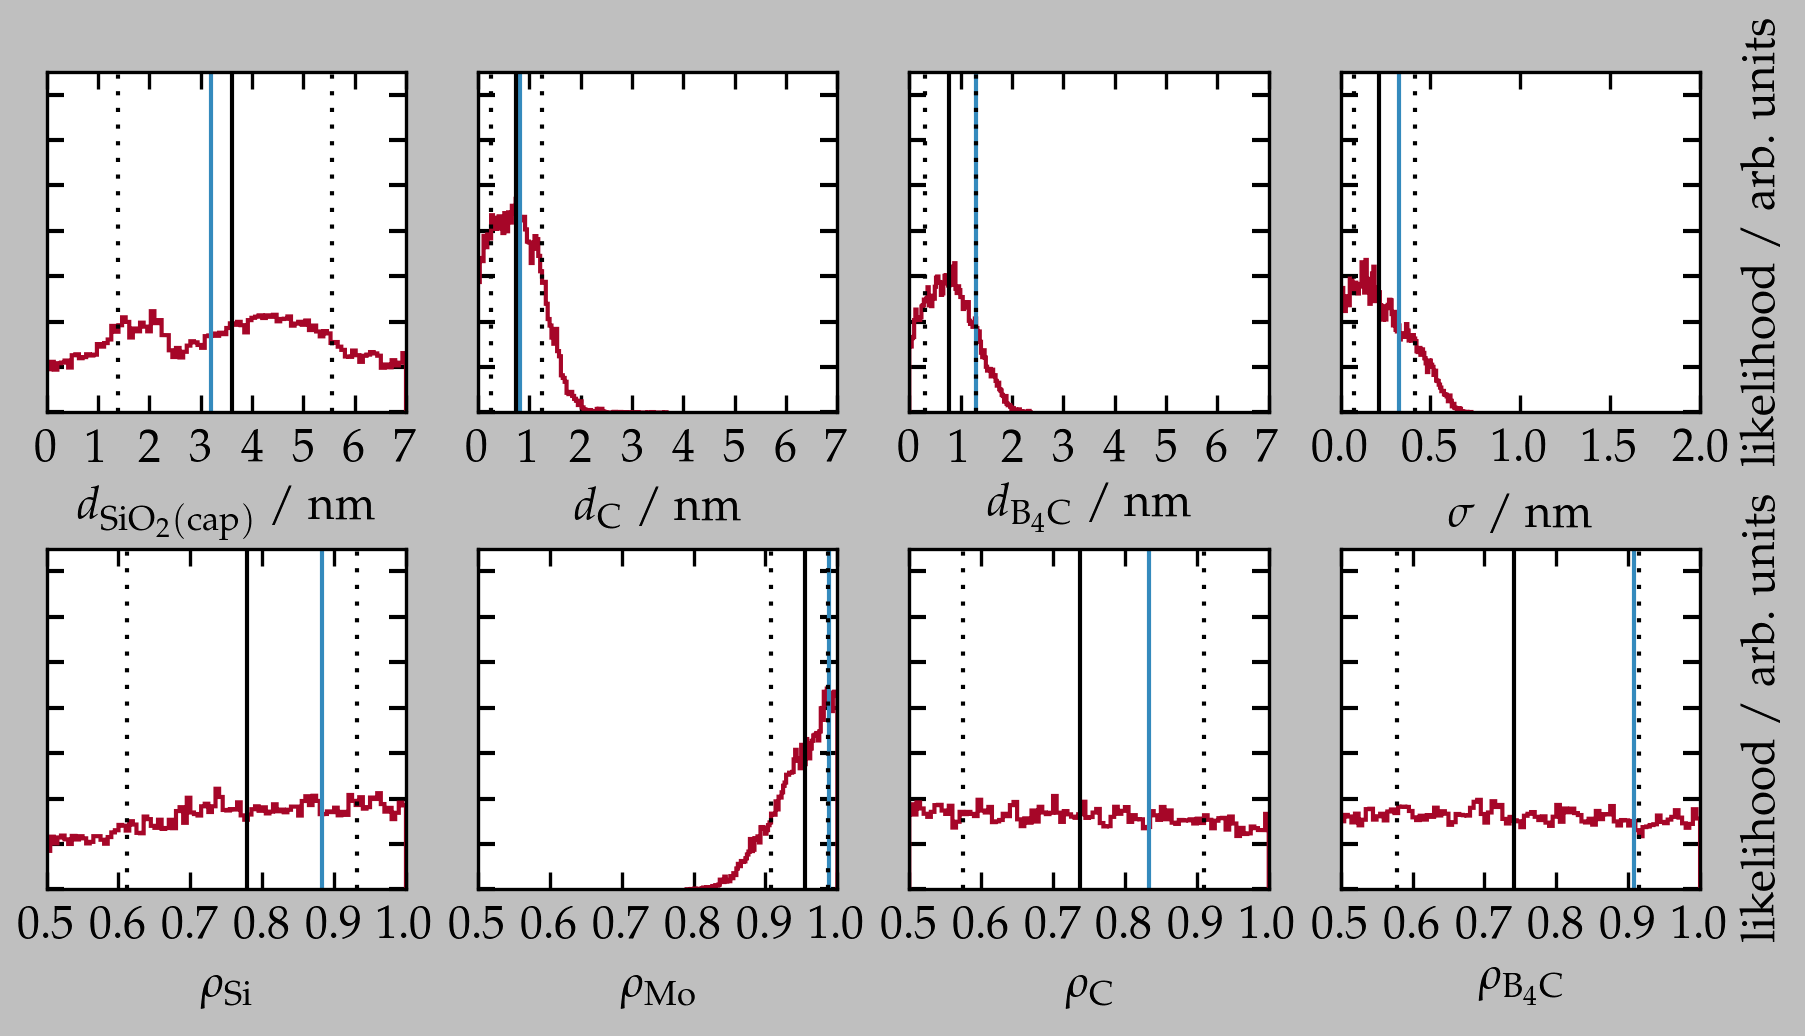

In [41]:
fig = plt.figure(figsize=fig_golden_ratio(14))
gs = gridspec.GridSpec(2,4)
gs.update(left=0, right=1.0,wspace=0.2, hspace=0.4)
ax = []
for i in xrange(2):
    for j in xrange(4):
        ax.append(fig.add_subplot(gs[i,j]))
        
ch = [chain[:,0],chain[:,3],chain[:,8],chain[:,4],chain[:,5],chain[:,6],chain[:,7],chain[:,9]]
ls = [cols[0],cols[3],cols[8],cols[4],cols[5],cols[6],cols[7],cols[9]]
ps = [p[0],p[3],p[8],p[4],p[5],p[6],p[7],p[9]]
lbs =[lb[0],lb[3],lb[8],lb[4],lb[5],lb[6],lb[7],lb[9]]
ubs =[ub[0],ub[3],ub[8],ub[4],ub[5],ub[6],ub[7],ub[9]]
        
for i,a in enumerate(ax):
    ax[i].hist(ch[i], 100, histtype='step', normed=False, color=data_color)
    ax[i].set_ylim((0.0,15000))
    ax[i].vlines(ps[i],0.0,ax[i].get_ylim()[1], color='#348ABD', linestyle="-", lw=1)
    l,u,c = np.percentile(ch[i],(50-34.1,50+34.1,50.0))
    ax[i].vlines(l,0.0,ax[i].get_ylim()[1], color='black', linestyle="dotted", lw=1)
    ax[i].vlines(u,0.0,ax[i].get_ylim()[1], color='black', linestyle="dotted", lw=1, label="$\\pm 1$ $\\sigma$")
    ax[i].vlines(c,0.0,ax[i].get_ylim()[1], color='black', linestyle="-", lw=1, label="$50\%$")
    ax[i].set_xlim((lbs[i],ubs[i]))
    ax[i].set_yticklabels(())
    ax[i].set_xlabel(ls[i])
    if i == 3 or i ==7:
        ax[i].yaxis.set_label_position('right')
        ax[i].set_ylabel("likelihood / arb. units", labelpad=10)
    #ax[i].text(0.07,0.93,"b)",transform=ax[i].transAxes,verticalalignment='top')
fig.savefig("/home/ahaase/Dropbox/PTB/Dissertation/thesis/img/PTB17_MCMC_other_params.pdf")
fig

In [202]:
l,u,c = np.percentile(chain[:,:],(50-34.1,50+34.1,50.0), axis=0)
l2,u2,c2 = np.percentile(chain[:,:],(50-(34.1+13.6),50+(34.1+13.6),50.0), axis=0)

In [211]:
cols

['$d_{\\mathrm{SiO}_2\\mathrm{(cap)}}$',
 '$d_\\mathrm{Si}$',
 '$d_\\mathrm{Mo}$',
 '$d_\\mathrm{C}$',
 '$\\sigma$',
 '$\\rho_\\mathrm{Si}$',
 '$\\rho_\\mathrm{Mo}$',
 '$\\rho_\\mathrm{C}$',
 '$d_{\\mathrm{B}_4\\mathrm{C}}$',
 '$\\rho_{\\mathrm{B}_4\\mathrm{C}}$']

In [215]:
names = ['$d_\\text{SiO$_2$(cap)}$ / nm &',
'$d_\\text{Si}$ / nm &',
'$d_\\text{Mo}$ / nm &',
'$d_\\text{C}$ / nm &',
'$\\sigma$ / nm &',
'$\\rho_\\text{Si}$ &',
'$\\rho_\\text{Mo}$ &',
'$\\rho_\\text{C}$ &',
'$d_\\text{B$_4$C}$ / nm &',
'$\\rho_\\text{B$_4$C}$ &']

In [40]:
pc

NameError: name 'pc' is not defined

In [220]:
for i,p in enumerate(pc):
    print "%s $%.3f({%.3f}/{+%.3f})$ & $%.3f({%.3f}/{+%.3f})$ \\\\" % (names[i], np.round(c[i],3),l[i]-c[i], u[i]-c[i],c[i],l2[i]-c[i], u2[i]-c[i])

$d_\text{SiO$_2$(cap)}$ / nm & $3.677({-2.252}/{+1.944})$ & $3.677({-3.407}/{+3.108})$ \\
$d_\text{Si}$ / nm & $2.338({-0.497}/{+0.616})$ & $2.338({-0.916}/{+1.294})$ \\
$d_\text{Mo}$ / nm & $3.137({-0.587}/{+0.560})$ & $3.137({-1.054}/{+1.016})$ \\
$d_\text{C}$ / nm & $0.744({-0.477}/{+0.510})$ & $0.744({-0.696}/{+0.971})$ \\
$\sigma$ / nm & $0.214({-0.143}/{+0.201})$ & $0.214({-0.204}/{+0.347})$ \\
$\rho_\text{Si}$ & $0.782({-0.167}/{+0.147})$ & $0.782({-0.264}/{+0.208})$ \\
$\rho_\text{Mo}$ & $0.953({-0.048}/{+0.034})$ & $0.953({-0.094}/{+0.045})$ \\
$\rho_\text{C}$ & $0.739({-0.164}/{+0.175})$ & $0.739({-0.228}/{+0.249})$ \\
$d_\text{B$_4$C}$ / nm & $0.782({-0.471}/{+0.511})$ & $0.782({-0.722}/{+0.973})$ \\
$\rho_\text{B$_4$C}$ & $0.741({-0.162}/{+0.172})$ & $0.741({-0.230}/{+0.247})$ \\


In [197]:
u

array([ 5.62131145,  2.95459253,  3.69748698,  1.25435951,  0.41549251,
        0.92862391,  0.98684296,  0.91376819,  1.29333862,  0.91374269])

In [200]:
l,u,c = np.percentile(chain[:,:],(50-(34.1+13.6),50+(34.1+13.6),50.0), axis=0)

# Diffuse Scattering, DWBA

In [145]:
%cd /home/ahaase/pc/Daten/DWBA
import bigref
reload(bigref)

def eval_dwba(p, wavelength, angle_in, angle_out, structure):
    import numpy as np
    import reflectivity
    import dwba
    
    sio2, si, mo, c, s, d_si, d_mo, d_C, b4c, d_b4c = structure
    
    s, xi_l , xi_p, H = p
    beta = 0.0
    
    r=250.0
    wx=4.5
    wy=4.5
    
    omega = 4*np.arctan(wx*wy/(2*r*np.sqrt(4*r**2+wx**2+wy**2)))
    
    roughness = 0.0
    stack = [c,si,b4c,mo]
    capthicknesses = [sio2,si,b4c,mo]
    henkes = ["C",'Si',"B4C",'Mo']
    caphenkes = ["SiO2",'Si','B4C',"Mo"]
    densities = [d_C,d_si,d_b4c,d_mo]
    capdensities = [d_si,d_si,d_b4c,d_mo]
    N=49
    
    r = reflectivity.fields_dwba(angle_in,angle_out,
                     wavelength,
                     stack, henkes,
                     N, None, roughness, "Si", densities,
                     None, 0,
                     capthicknesses,caphenkes,capdensities)

    r1, t1, r2, t2, qx, qz, t, n = r
    spec = (r1, t1, r2, t2)
    dw = dwba.dwba_tilted_qx_fast(spec, qx, t, n, wavelength, qz, xi_l, xi_p, angle_in, H, s, beta)
    dwba_result = dw
    return omega*np.real(np.array(dwba_result))

def calc_cuts(p, aoi, aof, wl, structure):
    import numpy as np
    res = []   
    for n, ai in enumerate(aoi):
        dwba = eval_dwba(p, wl, aoi[n], aof[n], structure)
        res.append(dwba)
    return np.array(res)

def showimage(res, angle_in, angle_out, ls,name,clim=None, qzmin=None, qzmax=None):
    %cd /home/ahaase/pc/Daten/DWBA
    import qspace
    fig, qmap, qxgrid, qzgrid = qspace.image(np.real(np.array(res)), angle_in, angle_out, ls, "viridis", True, 2.5)
    ax = fig.get_axes()[0]
    
    real_ai=angle_in
    real_af=angle_out
    ai = np.radians(angle_in)
    af = np.radians(angle_out)
    K0 = 2*np.pi/ls
    qx = np.outer(K0,( np.sin(np.radians(real_af)) - np.sin(np.radians(real_ai)) ))
    qz = np.outer(K0,( np.cos(np.radians(real_af)) + np.cos(np.radians(real_ai)) ))
    if qzmin and qzmax:
        ax.axis([-0.4,0.4,qzmin,qzmax])
    else:
        ax.axis([-0.4,0.4,np.min(qz),np.max(qz)])
    wls=[3.1276,3.1406,3.1144]
    ar=np.radians(1.5)
    
    img = ax.get_images()[0]
    #ax.hlines(0.929,0,-0.4,colors='r',linestyles='dashed')
    if clim:
        img.set_clim([0,clim])
    img.get_cmap().set_bad('white')
    ax.text(0.05,0.9,name,transform = ax.transAxes, color='r')
    ax.axvspan(-0.025,0.025,color='white')
    fig.canvas.draw()
    return qmap, qxgrid, qzgrid

/home/ahaase/pc/Daten/DWBA


In [94]:
%cd /home/ahaase/pc/Daten/KW16_2013-04-16 EUV PTB#17 Rocking
scan_rock30 = bigref.BigRefRockingPTB17SX700(["daten/123*"],30,"daten/123_00063.hdf",2,0,3E-16,7E-16)
scan_rock30.process(["daten/123_00063.hdf","daten/123_00099.hdf","daten/123_00100.hdf","daten/123_00101.hdf"])

%cd /home/ahaase/pc/Daten/KW15_2013-04-12 EUV_PTB#17_Rocking
scan_rock135 = bigref.BigRefRockingPTB17SX700(["datenRocking/038*"],13.5,"datenRocking/038_00101.hdf",3,480,-0.7E-16, 3E-16)
scan_rock135.process(["datenRocking/038_00101.hdf","datenRocking/038_00049.hdf","datenRocking/038_00050.hdf","datenRocking/038_00051.hdf","datenRocking/038_00052.hdf"])

%cd /home/ahaase/pc/Daten/KW12_2013-03-22 EUV_PTB#17
scan4 =  bigref.BigRefTwoThetaPTB17SX700(["daten/066_*"],6.75,"daten/067.hdf","daten/068.hdf",3,-1.3E-16,-1.3E-16,3E-16)
scan4.process(0)

/home/ahaase/pc/Daten/KW16_2013-04-16 EUV PTB#17 Rocking
started processing...
finished processing 65 files!
/home/ahaase/pc/Daten/KW15_2013-04-12 EUV_PTB#17_Rocking
started processing...
finished processing 101 files!
/home/ahaase/pc/Daten/KW12_2013-03-22 EUV_PTB#17
started processing...
finished processing 76 files!


In [95]:
angle_in = ones(320)*6.75
angle_out= linspace(-10,97,320)
ls=linspace(12.0,14.0,200)

xl =5.5792008
xp = 7.51207706
sigma =  0.20079
hurst =  0.99999993

In [96]:
pc

array([ 3.19439904,  2.42090645,  2.459909  ,  0.81130589,  0.32289642,
        0.88288504,  0.9886541 ,  0.83327468,  1.3081704 ,  0.90863311])

In [74]:
scanvar = scan_rock30
angleIn = [a for a in np.sort(np.array([float(a)+2.891 for a in scanvar._data.keys()]))]
angleOut= [30-a for a in np.sort(np.array([float(a)+2.891 for a in scanvar._data.keys()]))]
dwbares_r = calc_cuts([sigma,xl,xp,hurst,0.0], angleIn,angleOut,ls,pc)
qmap_r, qxgrid_r, qzgrid_r = showimage(dwbares_r, angleIn,angleOut,ls, "")

/home/ahaase/pc/Daten/DWBA


In [75]:
scanvar = scan4
angleOut = np.sort(np.array([float(a)-scanvar._AOI for a in scanvar._data.keys()]))
angleIn = [6.75 for i in angleOut]
dwbares_tt = calc_cuts([sigma,xl,xp,hurst,0.0], angleIn,angleOut,ls,pc)
qmap_tt, qxgrid_tt, qzgrid_tt = showimage(dwbares_tt, angleIn,angleOut,ls, "")

/home/ahaase/pc/Daten/DWBA


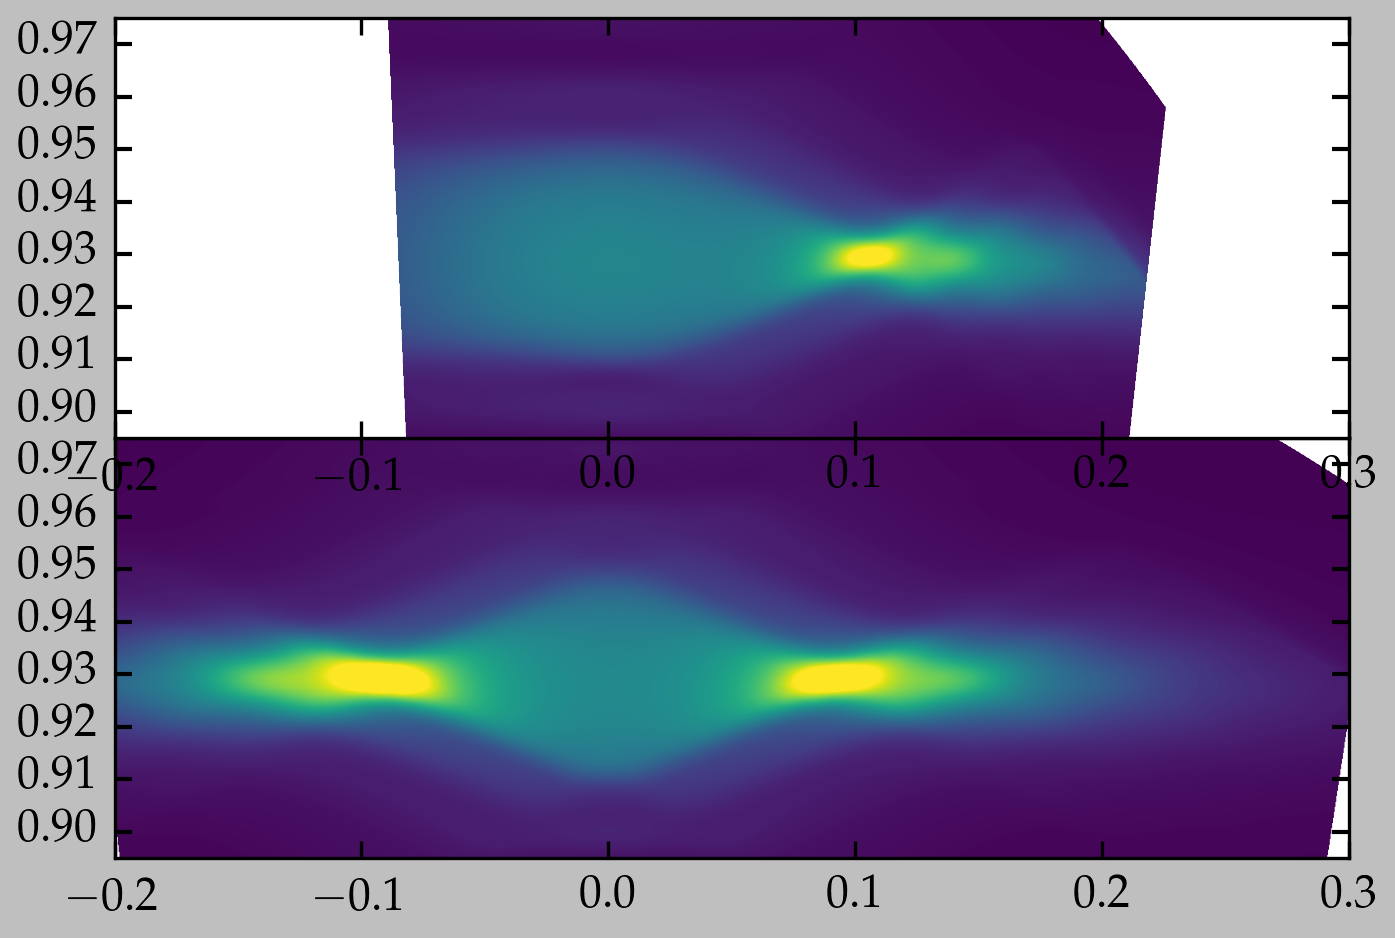

In [79]:
fig = figure(figsize=(5.905511811023622,3.5))
gs = GridSpec(2,20)
gs.update(hspace=0)
ax_r = fig.add_subplot(gs[1,:18])
ax_tt = fig.add_subplot(gs[0,:18])

ax_r.imshow(qmap_r,extent=(nanmin(qxgrid_r),nanmax(qxgrid_r),nanmax(qzgrid_r),nanmin(qzgrid_r)), aspect='auto',cmap='viridis', clim=(0,3.5E-5))
ax_r.axis([-0.2,0.3,0.895,0.975])
ax_tt.imshow(qmap_tt,extent=(nanmin(qxgrid_tt),nanmax(qxgrid_tt),nanmax(qzgrid_tt),nanmin(qzgrid_tt)), aspect='auto',cmap='viridis', clim=(0,3.5E-5))
ax_tt.axis([-0.2,0.3,0.895,0.975])
fig

## MCMC

In [185]:
import corner
import datetime

import matplotlib
matplotlib.use('Tkagg')
from matplotlib import pyplot as plt

#from setup_fit_e4 import *

import emcee

def lnprior(x):
    for i, y in enumerate(x):
        if y <= lb[i] or y >= ub[i]:
            return -np.inf
    return 0.0

# we use e^(-chisqr/2) as our likelihood, with chisqr from the log-intensities.
def lnlike(x):
    return -objective(x)/2

# combined probability
def lnprob(x):
    lp = lnprior(x)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(x)

from IPython.display import clear_output
def mcmc(xopt, theview, nwalkers=100, steps=1000, start=None, filenames="progress", samplename="PS56XX", **kwargs):
    # initialize walkers around our solution from pso, using a tiny gaussian ball around xopt
    # use 500 walkers to get better statistics
    ndim = len(xopt)
    if start is None:
        start_pos = [xopt + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
    else:
        start_pos = start

    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, pool=theview, threads=None ,**kwargs)
    #sampler.run_mcmc(start_pos, steps)
    start = datetime.datetime.now()
    for sn, st in enumerate(sampler.sample(start_pos, iterations=steps)):
        #print sn
        if sn % 10== 0:
            print('MCMC: {} steps done in {}'.format(sn+1, datetime.datetime.now()-start))
            print('Total time estimate: {}'.format(steps*(datetime.datetime.now()-start)/(sn+1)))
            print('Total time remaining: {}'.format((steps-sn+1)*(datetime.datetime.now()-start)/(sn+1)))
            plot_chains_collective(sampler, fname=filenames, ndim=ndim, lim=sn)
            np.save("chain_%s_intermediate.npy" % samplename, sampler.chain)
            np.save("lnprob_%s_intermediate.npy" % samplename, sampler.lnprobability)

    # we throw away the first steps as burn-in
    samples = sampler.chain[:, :, :].reshape((-1, ndim))

    return sampler, samples

# some diagnostics
def plot_chains(sampler, fname=None, ndim=ndim, lim=1000):
    figures = {}
    for k in xrange(ndim):
        figures[cols[k]] = plt.figure()
        plt.title(cols[k])
        for i in xrange(len(sampler.chain)):
            plt.plot(sampler.chain[i,:lim,k], color='k', alpha=0.02)
    if fname is not None:
        for col in figures:
            figures[col].savefig(fname + col + '.png')
            plt.close(figures[col])
        return
    return figures

def plot_chains_collective(sampler, fname=None, ndim=ndim, lim=1000):
    figure = plt.figure(figsize=(18,14))
    ax = []
    for i in xrange(ndim):
        ax.append(figure.add_subplot(4,4,i+1))
    for k in xrange(ndim):
        ax[k].set_title(cols[k])
        for i in xrange(len(sampler.chain)):
            ax[k].plot(sampler.chain[i,:lim,k], color='k', alpha=0.02)
    if fname is not None:
        figure.savefig(fname + '.png')
        plt.close(figure)
        return
    return figures

In [186]:
def residual_dwba(p, cuts=None, structure=None):
    import numpy as np
    res = []
    datar = []
    for (ai, af, wl, dat, dat_err) in cuts:
        datar.append(dat)
    corrarr = np.nanmin(np.array(datar),axis=1)
    dat_err_percent = np.nanmax(np.array(datar))*0.01
    
    for n, (ai, af, wl, dat, dat_err) in enumerate(cuts):
        error = dat_err+dat_err_percent
        dat-=corrarr[n]
        dwba = eval_dwba(p, wl, ai, af, structure)
        res.append(np.abs((dwba-dat)/error)**2)
    res = np.array(res)
    return res/len(res)

def objective(p):
    res = residual_dwba(p, cuts, structure)
    chisq = np.sum(res)
    return chisq

In [187]:
lb, ub = ([0.0,0.0,0.0, 0.0],
          [1.0,20.0,20.0, 1.0])
cols = ["sigma", "xiparallel", "xiperp", "H"]
p = lb
structure = pc

In [188]:
cuts = bigref.cutgenerator(scan_rock30, sorted(scan_rock30._data.keys(), key=float))

In [195]:
from ipyparallel import Client


# Set up the interface to the ipcluster.
c = Client(profile='main', retries=5)
view = c[:]
lbview = c.load_balanced_view()
def push():
    view.execute("import numpy as np")
    view.execute("import reflectivity")
    view.execute("import helper")
    view.push({"lnlike": lnlike})
    view.push({"lnprior": lnprior})
    view.push({"objective": objective})
    view.push({"cols" : cols})

    view.push({"lnprob": lnprob, 
               "residual_dwba" : residual_dwba,
               "eval_dwba" : eval_dwba,
               "lb" : lb, 
               "ub" : ub, 
               "cuts" : cuts, "structure" : structure})
    print len(view)
push()

28


In [196]:
%cd /home/ahaase/Dropbox

/home/ahaase/Dropbox


In [ ]:
walker = 28*4
iterations = 1000
start = np.zeros((walker,len(lb)))
for i in xrange(walker):
    for j in xrange(len(lb)):
        start[i,j] = random.uniform(lb[j]+0.01,ub[j])

#startchain = np.load("chain_%s_fixH_dwba_half.npy" % name)
#start = startchain[:,-1,:]
print "%s with %i iters" % (name, iterations)

push()


sampler, samples = mcmc(p, lbview, walker, iterations, start, samplename=name+'_dwba_rot')

PTB17 with 1000 iters
28
